# AI300
### Regularization

The key difference between ridge and lasso regulaizartion is that the regularization term for ridge regression uses the L2 norm squared and the regularization term for lasso regression uses the L1 norm. As a result, ridge regression sets more of the coefficients to be very close to $0$, but lasso regularization sets some of the terms to be exactly $0$.

We can substitute our matrix into $\mathbf{v}^T\mathbf{A}\mathbf{v}$ and see if it's greater than $0$. Plugging in our matrix:
$$
\mathbf{v}^T(\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})\mathbf{v}\\
= \mathbf{v}^T\mathbf{X}^T\mathbf{X}\mathbf{v}+\mathbf{v}^T(\lambda\mathbf{I})\mathbf{v}
$$
We could rewrite the first term as a squared norm like $||\mathbf{X}\mathbf{v}||^2_2$, which is always positive. And since we know that $\lambda>0$ and $\mathbf{v}\neq0$ that the second term is positive as well. So the whole thing is positive, and thus positive definite, which means it's always invertible.

The cost function is
$$
J(\theta) = ||\mathbf{y}-\mathbf{X}\theta||_2^2+\lambda||\theta||_2^2 \\
= (\mathbf{y}-\mathbf{X}\theta)^T(\mathbf{y}-\mathbf{X}\theta) +\lambda\theta^T\theta
\\ = \mathbf{y}^T\mathbf{y}-2\theta^T\mathbf{X}^T\mathbf{y}+\theta^T\mathbf{X}^T\mathbf{X}\theta+\lambda\theta^T\theta
$$
We can find the gradient of each of the terms and set the whole thing equal to $\mathbf{0}$.
$$
\nabla_\theta(\mathbf{y}^T\mathbf{y})=\mathbf{0} \\
\nabla_\theta(-2\theta^T\mathbf{X}^T\mathbf{y}) =-2\mathbf{X}^T\mathbf{y} \\
\nabla_\theta(\theta^\top\mathbf{X}^T\mathbf{X}\theta)=2\mathbf{X}^\top\mathbf{X}\theta \\
\nabla_\theta(\lambda\theta^T\theta) = 2\lambda\mathbf{I}\theta\\
$$
So:
$$
\mathbf{0} = -2\mathbf{X}^\top\mathbf{y}+2\mathbf{X}^\top\mathbf{X}\theta+2\lambda\mathbf{I}\theta \\
\mathbf{0} = -\mathbf{X}^\top\mathbf{y}+\mathbf{X}^\top\mathbf{X}\theta +\lambda\mathbf{I}\theta \\
\mathbf{X}^\top\mathbf{y}=\mathbf{X}^\top\mathbf{X}\theta+\lambda\mathbf{I}\theta \\
\mathbf{X}^\top\mathbf{y} = (\mathbf{X}^\top\mathbf{X}+\lambda\mathbf{I})\theta \\
\theta = (\mathbf{X}^\top\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X}^\top\mathbf{y}
$$
We can write the SVD of $\mathbf{X}$ as $\mathbf{U}\mathbf{\Sigma}\mathbf{V}^T$.
$$
\theta = ((\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top)^\top(\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top) + \lambda\mathbf{I})^{-1}(\mathbf{U}\mathbf{\Sigma}\mathbf{V}^T)^\top\mathbf{y} \\
\theta = ((\mathbf{V}\Sigma^\top\mathbf{U}^\top)(\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top) + \lambda\mathbf{I})^{-1}(\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top)^\top\mathbf{y} \\
\theta = (\mathbf{V}\Sigma^\top(\mathbf{U}^\top\mathbf{U})\mathbf{\Sigma}\mathbf{V}^\top) + \lambda\mathbf{I})^{-1}(\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top)^\top\mathbf{y} \\
\theta = (\mathbf{V}(\Sigma^\top\mathbf{\Sigma})\mathbf{V}^\top) + \lambda\mathbf{I})^{-1}(\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top)^\top\mathbf{y}\\
\theta = (\mathbf{V}(\Sigma^\top\mathbf{\Sigma})\mathbf{V}^\top + \lambda\mathbf{I})^{-1}(\mathbf{V}\mathbf{\Sigma}^\top\mathbf{U}^\top)\mathbf{y}
$$
Using $\mathbf{D}=\mathbf{\Sigma}^\top\mathbf{\Sigma}$.
$$
\theta = (\mathbf{V}\mathbf{D}\mathbf{V}^\top + \lambda\mathbf{I})^{-1}(\mathbf{V}\mathbf{\Sigma}^\top\mathbf{U}^\top)\mathbf{y} \\
\theta = (\mathbf{V}(\mathbf{D}+\lambda\mathbf{I})\mathbf{V}^\top)^{-1}(\mathbf{V}\mathbf{\Sigma}^\top\mathbf{U}^\top)\mathbf{y} \\
\theta = (\mathbf{V}^\top)^{-1}(\mathbf{D}+\lambda\mathbf{I})^{-1}\mathbf{V}^{-1}(\mathbf{V}\mathbf{\Sigma}^\top\mathbf{U}^\top)\mathbf{y} \\
\theta = \mathbf{V}(\mathbf{D}+\lambda\mathbf{I})^{-1}\mathbf{V}^\top(\mathbf{V}\mathbf{\Sigma}^\top\mathbf{U}^\top)\mathbf{y} \\
\theta = \mathbf{V}(\mathbf{D}+\lambda\mathbf{I})^{-1}\mathbf{\Sigma}^\top\mathbf{U}^\top\mathbf{y}
$$

I'm not exactly sure to do parts c and d in this equation, so I was wondering if I could receive guidance/support?

In [ ]:
import numpy as np

class MyLinearRidge():
  def __init__(self):
    self._coef = None

  def fit(self, X_train, y_train, lda):
    U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
    self._coef = Vt.T @ (S / (np.square(S) + lda) * (U.T @ y_train))

  def predict(self, X_test):
    y_pred = X_test @ self._coef
    return y_pred

  def score(self, X_test, y_test):
    predictions = self.predict(X_test)
    mse = np.mean(np.square(predictions - y_test))
    return mse

I'm also not sure to do question 4 (I sent an email through Canvas too).

In [ ]:
import numpy as np

class MyLinearRidgeDual():
  def __init__(self):
    self._coef = None

  def fit(self, X_train, y_train, alpha):
    I = np.eye(X_train.shape[0])
    a = np.linalg.inv(X_train @ X_train.T + alpha * I) @ y_train
    self._coef = X_train.T @ a

  def predict(self, X_test):
    y_pred = X_test @ self._coef
    return y_pred

  def score(self, X_test, y_test):
    predictions = self.predict(X_test)
    mse = np.mean(np.square(predictions - y_test))
    return mse

MSE: 550.8781658622909


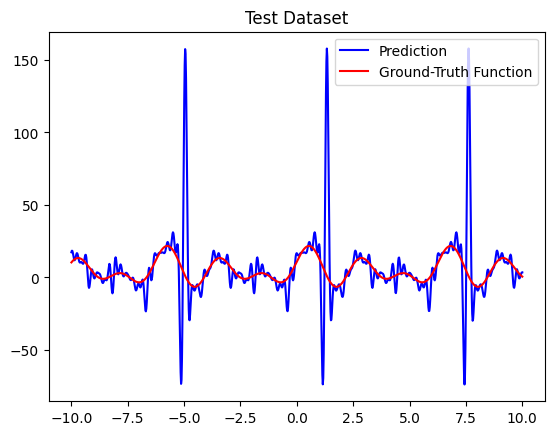

MSE: 46.66870175247942


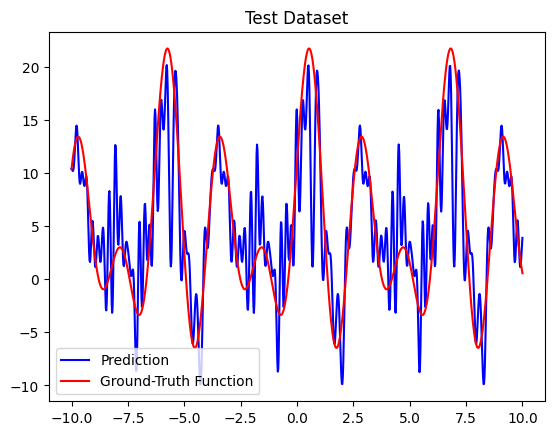

MSE: 31.95517476921121


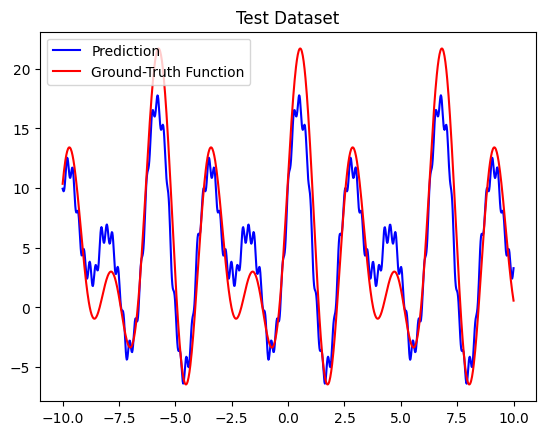

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt

intercept_ = np.array(5)
coef_ = np.array([2, 3, 6, 4, -2, 7])

def h_ground_truth(X):
  fourier_basis = np.stack([np.cos(X), np.sin(X), np.cos(2 * X), np.sin(2 * X), np.cos(3 * X), np.sin(3 * X)], axis=1)
  return intercept_ + fourier_basis @ coef_

num_train_samples = 100
X_LB, X_UB = -10, 10
sigma = 5

np.random.seed(42)
X_train = np.random.uniform(X_LB, X_UB, size=(num_train_samples,))
y_train = h_ground_truth(X_train) + np.random.normal(scale=sigma, size=(num_train_samples,))
num_test_samples = 1000
X_test = np.linspace(X_LB, X_UB, num_test_samples)
y_test = h_ground_truth(X_test) + np.random.normal(scale=sigma, size=(num_test_samples,))

def linear_reg(max_harmonics=30, alpha=0, reg_mode=None):
  phi_x_train_list = []
  for j in range(max_harmonics + 1):
    phi_x_train_list.append(np.cos(j * X_train))
    phi_x_train_list.append(np.sin(j * X_train))
  phi_x_train = np.stack(phi_x_train_list, axis=1)

  if reg_mode == "Ridge":
    model = Ridge(alpha=alpha)
  elif reg_mode == "Lasso":
    model = Lasso(alpha=alpha)
  else:
    model = LinearRegression()

  model.fit(phi_x_train, y_train)
  phi_x_test_list = []
  for j in range(max_harmonics + 1): # Changed range to include j=0 for consistency
    phi_x_test_list.append(np.cos(j * X_test))
    phi_x_test_list.append(np.sin(j * X_test))
  phi_x_test = np.stack(phi_x_test_list, axis=1)

  y_pred = model.predict(phi_x_test)
  mse = np.mean((y_pred - y_test) ** 2)
  print(f"MSE: {mse}")

  plt.plot(X_test, y_pred, c="b")
  plt.plot(X_test, h_ground_truth(X_test), c="r")
  plt.title("Test Dataset")
  plt.legend(["Prediction", "Ground-Truth Function"])
  plt.show()

linear_reg()
linear_reg(alpha=10, reg_mode='Ridge')
linear_reg(alpha=0.6, reg_mode='Lasso')

# Things I noticed
# Linear regression doesn't fit very well at all. It has a MSE of about 550.9 and
# from the plot, it has these odd, gigantic "leaps" that don't match the GT function
# Regularizing does significantly better, ridge regression has onlny a mse of 46.67
# and is able to match the GT function closer, though it seems to overfit a little bit,
# producing lots of wavy ups and downs the GT function doesn't come close to having
# Lasso regression does the best, so it seems a strong regularization is good here.
# It matches the GT function pretty well and only has a MSE of about 32, a drastic
# jump down from our original MSE a little over 550.

Usually, one wouldn't want to regularize the intercept in ridge or lasso regularization, because it would center the data around the origin, which usually isn't desired. But if someone wanted to, they could set `fit_intercept=False` while fitting the model and later a column of $1$'s to the dataset, which would create a feature of just $1$'s, which would be the intercept. Then, lasso or ridge regression would be able to regularize the intercept.